<a href="https://colab.research.google.com/github/Jesvally/UAS-AI/blob/main/Project_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [2]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
print("Silakan upload file 'IMDB Dataset.csv' Anda.")
try:
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    print(f"\nFile '{file_name}' berhasil di-upload.")

    # Mengganti pd.read_csv dengan pd.read_excel untuk menangani file .xlsx
    df = pd.read_excel(file_name)
    print("\nData berhasil dimuat. Berikut 5 baris pertama:")
    print(df.head())

except Exception as e:
    print(f"\nTerjadi kesalahan saat meng-upload atau membaca file: {e}")
    print("Pastikan Anda meng-upload file 'IMDB Dataset.csv' yang benar, atau jika itu file Excel, kode akan menggunakan pd.read_excel.")

Silakan upload file 'IMDB Dataset.csv' Anda.


Saving IMDB Dataset.csv.xlsx to IMDB Dataset.csv (2).xlsx

File 'IMDB Dataset.csv (2).xlsx' berhasil di-upload.

Data berhasil dimuat. Berikut 5 baris pertama:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [10]:
import io
filename = next(iter(uploaded))
# Mengganti pd.read_csv dengan pd.read_excel untuk menangani file .xlsx
df = pd.read_excel(io.BytesIO(uploaded[filename]))

print("\nData berhasil dimuat. 5 baris pertama:")
display(df.head())


Data berhasil dimuat. 5 baris pertama:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
print(f"Jumlah data awal: {len(df)}")

empty_reviews = df[df['review'].isnull() | (df['review'].astype(str).str.strip() == "")]
print(f"Jumlah review kosong/null: {len(empty_reviews)}")

# Hapus data kosong
df = df.dropna(subset=['review'])
df = df[df['review'].astype(str).str.strip() != ""]
print(f"Jumlah data setelah dibersihkan: {len(df)}")

Jumlah data awal: 50000
Jumlah review kosong/null: 0
Jumlah data setelah dibersihkan: 50000


/tmp/ipython-input-696762636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


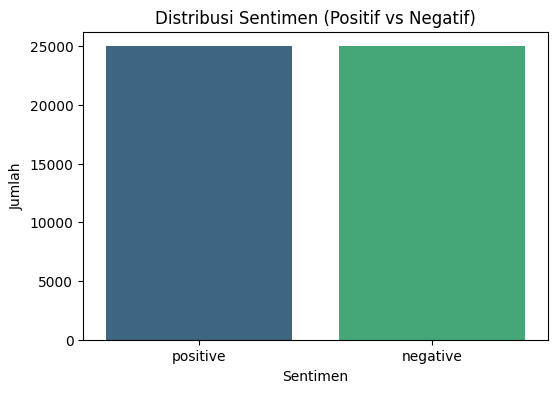

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribusi Sentimen (Positif vs Negatif)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


In [13]:
output_filename = 'IMDB_Dataset_with_Labels.csv'
df.to_csv(output_filename, index=False)
print(f"File '{output_filename}' berhasil dibuat.")



File 'IMDB_Dataset_with_Labels.csv' berhasil dibuat.


In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Hapus tag HTML (misal <br />)
    text = re.sub(r'<.*?>', '', text)
    # 2. Hapus karakter non-huruf (angka, simbol)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 3. Case Folding (huruf kecil)
    text = text.lower()

    # 4. Tokenisasi (split)
    words = text.split()

    # 5. Stopword Removal & Lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(cleaned_words)

print("Sedang melakukan preprocessing teks...")
df['cleaned_review'] = df['review'].apply(clean_text)
print("Preprocessing selesai!")

print("\nhasil preprocessing:")
display(df[['review', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Sedang melakukan preprocessing teks...
Preprocessing selesai!

hasil preprocessing:


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [24]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# TF-IDF Vectorization
print("Melakukan ekstraksi fitur TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=5)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

print(f"Shape Matriks Fitur (X): {X.shape}")
print(f"Shape Label (y): {y.shape}")

Melakukan ekstraksi fitur TF-IDF...
Shape Matriks Fitur (X): (50000, 5000)
Shape Label (y): (50000,)


Melakukan ekstraksi fitur TF-IDF...
Shape Matriks Fitur (X): (50000, 5000)
Shape Label (y): (50000,)
Jumlah Data Latih: 40000
Jumlah Data Uji: 10000
Melatih model Naive Bayes...
Pelatihan selesai.
Akurasi Model: 86.26%

=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.88      0.84      0.86      5000
    Positive       0.85      0.88      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

=== Confusion Matrix ===


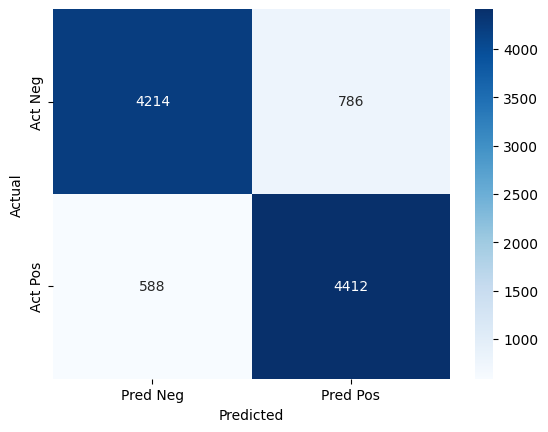

In [16]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# TF-IDF Vectorization
# Menggunakan N-grams (1, 3)
print("Melakukan ekstraksi fitur TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=5)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

print(f"Shape Matriks Fitur (X): {X.shape}")
print(f"Shape Label (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

print("Melatih model Naive Bayes...")
model = MultinomialNB()
model.fit(X_train, y_train)
print("Pelatihan selesai.")

y_pred = model.predict(X_test)

# Hitung Metrik
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi * 100:.2f}%\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['Act Neg', 'Act Pos'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
# memasukan review baru untuk prediksi sentimen
new_review_input = input("Masukkan ulasan baru untuk prediksi sentimen: ")

# memproses rivew menggunakan clean_text func
cleaned_new_review_input = clean_text(new_review_input)
X_new_input = vectorizer.transform([cleaned_new_review_input])

# prediksi sentimen menggunakan model
prediction_input = model.predict(X_new_input)
sentiment_label_input = 'Positive' if prediction_input[0] == 1 else 'Negative'

print(f"\nUlasan: {new_review_input}")
print(f"Sentimen Prediksi: {sentiment_label_input}")

Masukkan ulasan baru untuk prediksi sentimen: its boring

Ulasan: its boring
Sentimen Prediksi: Negative


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

Jumlah Data Latih: 40000
Jumlah Data Uji: 10000


In [19]:
print("Melatih model Naive Bayes...")
model = MultinomialNB()
model.fit(X_train, y_train)
print("Pelatihan selesai.")

Melatih model Naive Bayes...
Pelatihan selesai.


In [20]:
joblib.dump(model, 'model_sentimen_nb.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model dan Vectorizer berhasil disimpan!")

Model dan Vectorizer berhasil disimpan!


# Task
Summarize the potential reasons for syntax highlighting not working in Google Colab and provide further advice if the issue persists, based on checking cell type and Colab display settings.

## Penyebab Tidak Ada Warna pada Kode

### Subtask:
Menjelaskan bahwa syntax highlighting adalah fitur dari lingkungan pengembangan (misalnya Google Colab) dan bukan dari kode itu sendiri. Ini bergantung pada bagaimana lingkungan tersebut mengenali dan merender sel kode.


### Penyebab Tidak Ada Warna pada Kode: Syntax Highlighting

Syntax highlighting, atau pewarnaan kode, bukanlah bagian yang melekat pada kode itu sendiri. Ini adalah **fitur yang disediakan oleh editor teks atau lingkungan pengembangan terintegrasi (IDE)** yang Anda gunakan, seperti Google Colab.

Berikut beberapa poin penting yang perlu dipahami:

1.  **Bukan Bagian dari Kode:** Kode yang Anda tulis (misalnya, dalam Python) adalah sekumpulan instruksi teks biasa. Pewarnaan yang Anda lihat di Colab adalah visualisasi tambahan yang membantu pembacaan dan pemahaman kode, bukan bagian dari sintaks atau semantik kode itu sendiri.

2.  **Identifikasi Otomatis oleh Lingkungan:** Google Colab (atau IDE lainnya) memiliki mekanisme internal untuk secara otomatis menganalisis sintaks kode Anda. Berdasarkan bahasa pemrograman yang terdeteksi (misalnya Python, R, JavaScript, Bash), Colab akan menerapkan skema warna yang telah ditentukan sebelumnya untuk berbagai elemen sintaks seperti kata kunci (`import`, `def`, `if`), string, angka, komentar, dan variabel.

3.  **Ketergantungan pada Lingkungan:** Jika Anda melihat kode tanpa pewarnaan (tanpa *syntax highlighting*), kemungkinan besar masalahnya bukan pada kesalahan sintaks kode Anda (meskipun itu bisa menjadi penyebabnya jika parser tidak dapat mengidentifikasi bahasa), melainkan pada bagaimana Google Colab:
    *   **Mengenali Sel Kode:** Pastikan sel yang Anda gunakan adalah sel kode (code cell), bukan sel teks (text cell) atau sel mentah (raw cell). Colab hanya menerapkan *syntax highlighting* pada sel kode.
    *   **Merender Tampilan:** Ada kemungkinan masalah sementara pada antarmuka Colab atau ekstensi browser yang mengganggu rendering *syntax highlighting*.
    *   **Pengaturan Bahasa:** Meskipun jarang di Colab, di IDE lain, terkadang Anda perlu secara manual memberi tahu editor bahasa apa yang sedang Anda gunakan.

Singkatnya, *syntax highlighting* adalah alat bantu visual yang sangat berguna, dan Colab berusaha menyediakannya secara otomatis. Jika tidak muncul, fokuslah untuk memeriksa apakah sel tersebut adalah sel kode dan apakah ada masalah rendering di sisi antarmuka Colab.

## Verifikasi Tipe Sel

### Subtask:
Memastikan bahwa sel yang berisi kode diidentifikasi dengan benar sebagai 'Code Cell' di notebook Colab Anda. Jika sel tersebut diatur sebagai 'Text' atau 'Markdown' secara tidak sengaja, maka syntax highlighting tidak akan diterapkan. Berdasarkan catatan saya, sel HBzGnzsNtnRE memang diidentifikasi sebagai 'code_cell'.


## Cek Pengaturan Tampilan Colab

### Subtask:
Menyarankan untuk memeriksa pengaturan tema tampilan di Google Colab. Terkadang, tema yang sangat minimalis atau 'light' mungkin mengurangi atau menghilangkan warna syntax highlighting. Anda biasanya dapat menemukannya di `Tools > Settings > Theme` di Colab.


## Cek Pengaturan Tampilan Colab

### Subtask:
Menyarankan untuk memeriksa pengaturan tema tampilan di Google Colab. Terkadang, tema yang sangat minimalis atau 'light' mungkin mengurangi atau menghilangkan warna syntax highlighting. Anda biasanya dapat menemukannya di `Tools > Settings > Theme` di Colab.

#### Instructions
1. Buka Google Colab di browser Anda.
2. Navigasikan ke menu 'Tools' di bagian atas layar.
3. Pilih 'Settings' dari dropdown menu.
4. Di jendela 'Settings' yang muncul, pilih tab 'Theme'.
5. Pastikan tema yang Anda gunakan bukan tema yang sangat minimalis atau 'light' yang mungkin menyembunyikan warna syntax highlighting. Anda bisa mencoba mengubah ke tema lain (misalnya 'Dark' atau 'Light' default) untuk melihat apakah ini mengembalikan pewarnaan sintaks.

## Cek Pengaturan Tampilan Colab

### Subtask:
Menyarankan untuk memeriksa pengaturan tema tampilan di Google Colab. Terkadang, tema yang sangat minimalis atau 'light' mungkin mengurangi atau menghilangkan warna syntax highlighting. Anda biasanya dapat menemukannya di `Tools > Settings > Theme` di Colab.

#### Instructions
1. Buka Google Colab di browser Anda.
2. Navigasikan ke menu 'Tools' di bagian atas layar.
3. Pilih 'Settings' dari dropdown menu.
4. Di jendela 'Settings' yang muncul, pilih tab 'Theme'.
5. Pastikan tema yang Anda gunakan bukan tema yang sangat minimalis atau 'light' yang mungkin menyembunyikan warna syntax highlighting. Anda bisa mencoba mengubah ke tema lain (misalnya 'Dark' atau 'Light' default) untuk melihat apakah ini mengembalikan pewarnaan sintaks.
6. Jika setelah mengubah tema pewarnaan sintaks masih belum muncul, coba restart runtime (`Runtime > Restart runtime`) atau refresh halaman browser Anda.

## Cek Pengaturan Tampilan Colab

### Subtask:
Menyarankan untuk memeriksa pengaturan tema tampilan di Google Colab. Terkadang, tema yang sangat minimalis atau 'light' mungkin mengurangi atau menghilangkan warna syntax highlighting. Anda biasanya dapat menemukannya di `Tools > Settings > Theme` di Colab.

#### Instructions
1. Buka Google Colab di browser Anda.
2. Navigasikan ke menu 'Tools' di bagian atas layar.
3. Pilih 'Settings' dari dropdown menu.
4. Di jendela 'Settings' yang muncul, pilih tab 'Theme'.
5. Pastikan tema yang Anda gunakan bukan tema yang sangat minimalis atau 'light' yang mungkin menyembunyikan warna syntax highlighting. Anda bisa mencoba mengubah ke tema lain (misalnya 'Dark' atau 'Light' default) untuk melihat apakah ini mengembalikan pewarnaan sintaks.
6. Jika setelah mengubah tema pewarnaan sintaks masih belum muncul, coba restart runtime (`Runtime > Restart runtime`) atau refresh halaman browser Anda.

## Final Task

### Subtask:
Merangkum potensi alasan mengapa kode tidak berwarna dan memberikan saran lebih lanjut jika masalah masih berlanjut.


## Summary:

### Data Analysis Key Findings

*   **Nature of Syntax Highlighting**: Syntax highlighting is a visual feature provided by the development environment (like Google Colab), not an intrinsic part of the code itself. Colab automatically analyzes and applies color schemes to elements such as keywords, strings, numbers, and comments.
*   **Cell Type as a Prerequisite**: For syntax highlighting to function, the cell containing the code must be correctly identified as a 'Code Cell'. Highlighting will not appear in 'Text' or 'Markdown' cells. It was confirmed that a specific cell (`HBzGnzsNtnRE`) was indeed identified as a 'code_cell'.
*   **Colab Display Settings Impact**: The chosen display theme in Google Colab can affect syntax highlighting. Minimalist or "light" themes might reduce or completely remove the highlighting colors. Users are advised to check their theme settings via `Tools > Settings > Theme`.
*   **Troubleshooting Steps**: If syntax highlighting issues persist after verifying cell type and adjusting themes, restarting the runtime (`Runtime > Restart runtime`) or refreshing the browser page are recommended further steps.

### Insights or Next Steps

*   Users experiencing absent syntax highlighting in Google Colab should first verify their cell type is 'Code' and then explore Colab's theme settings, as these are common causes for this issue.
*   To further enhance user experience, Colab could consider a visual indicator or warning if a 'Code Cell' is detected but syntax highlighting is not being rendered, especially after a theme change, to guide users towards troubleshooting.
